# 계층적 클러스터링이란?
계층적 클러스터링(Hierachical  Clustering)은 순차적으로 유사한 데이터끼리 같은 클러스터로 묶어 나가는 모델입니다. 데이터를 아래에서부터 묶어 나간다고 해서 Bottom-up 클러스터링이라고도 합니다.

In [15]:
import pandas as pd
# 판다스 출력 결과를 소수점 둘째 자리 까지로 제한
pd.options.display.float_format = '{:,.2f}'.format
scaled_df = pd.read_csv('data/scaled_df.csv')
scaled_df

,total_buy_cnt,total_price
0,-0.05,-0.15
1,-0.07,0.21
2,0.23,0.95
3,-1.13,-1.03
4,-0.19,0.21
...,...,...
220,-0.89,-1.05
221,1.70,2.75
222,-1.24,-1.04
223,-0.67,0.19


In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
import matplotlib.pyplot as plt
import seaborn as sns

계층을 묶을 때 특정 데이터가 서로 유사하다는 것은 어떻게 정의할 수 있을까요? 대표적으로 Ward 거리라는 개념을 많이 사용합니다.   
Ward 거리란 각 클러스터의 Center와 속한 데이터들 사이 거리를 제곱하여 더한 값의 증가분을 뜻합니다.

계층적 클러스터링에는 linkage() 함수가 사용됩니다.   
linkage(): 데이터 간의 거리를 계산하는 함수   
파라미터로 데이터와 어떠한 거리 메소드를 사용할지 지정해 줘야 합니다. 

In [17]:
# 모델 학습
model = linkage(scaled_df, 'ward')

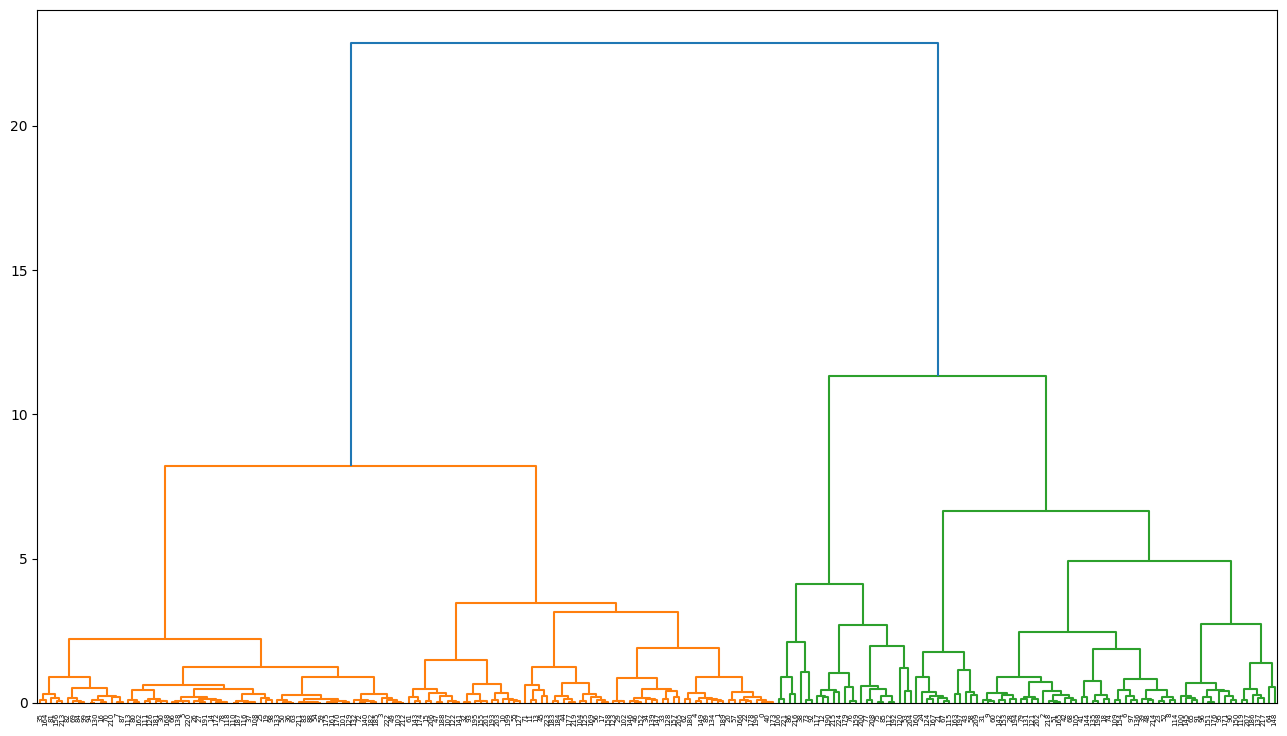

In [18]:
# 인덱스 가져오기
labelList = scaled_df.index 

# 덴드로그램 사이즈와 스타일 조정
plt.figure(figsize=(16,9))
plt.style.use("default")

# 덴드로그램 시각화
dendrogram(model, labels=labelList)
plt.show()

In [19]:
# 클러스터 5개로 나누기
cluster_num = 5

# 고객별 클러스터 라벨 구하기
scaled_df['label'] = cut_tree(model, cluster_num)

pd.DataFrame(scaled_df['label'].value_counts())

,count
label,
0,67
2,67
1,54
3,25
4,12


<Axes: xlabel='total_price', ylabel='total_buy_cnt'>

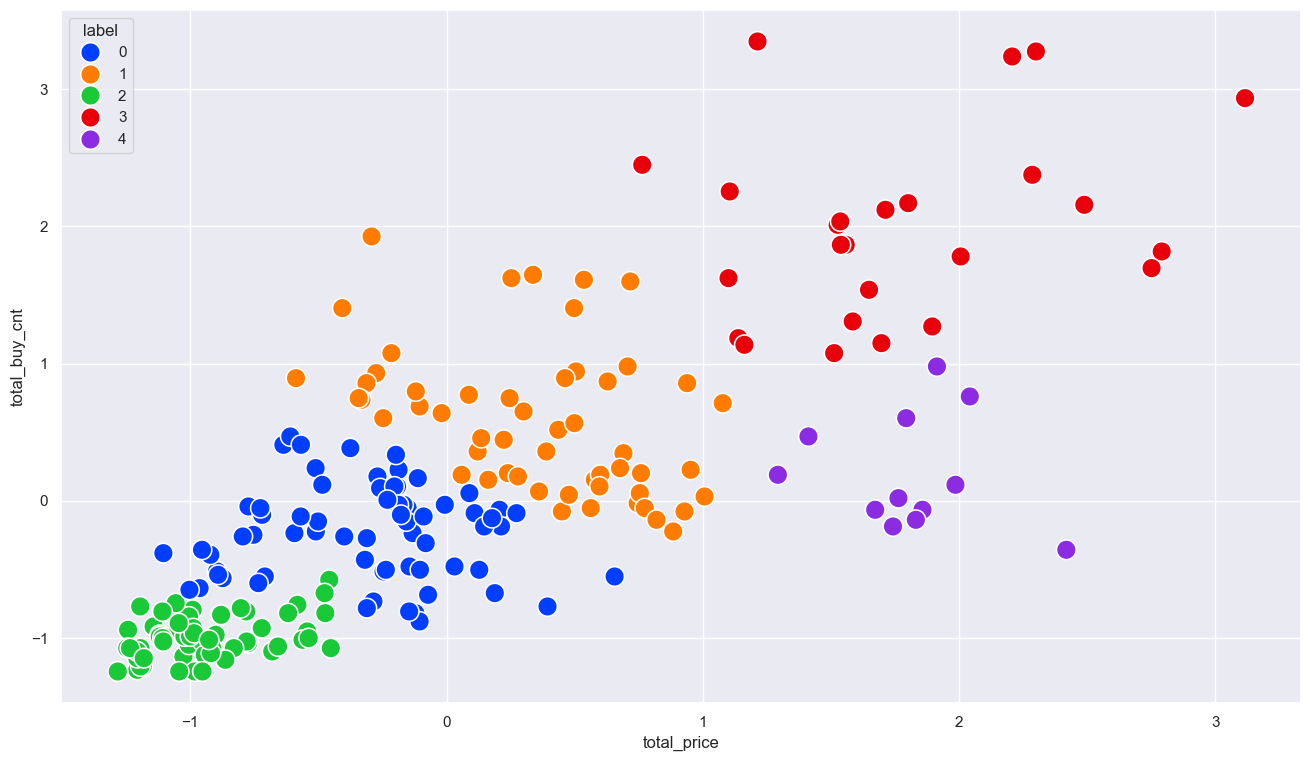

In [20]:
sns.set(style="darkgrid",
        rc = {'figure.figsize':(16,9)})

# 산점도 시각화
sns.scatterplot(x=scaled_df['total_price'], y=scaled_df['total_buy_cnt'], hue=scaled_df['label'], s=200, palette='bright')

## 계층적 클러스터링 장단점
#### 장점
- 계층적 클러스터링의 가장 큰 장점은 모델을 학습시킬 때 클러스터의 개수를 미리 가정하지 않아도 된다는 점입니다.
- k-means는 사전에 정한 k 값에 따라 결과가 달라졌지만, 계층적 클러스터링은 클러스터의 개수에 상관 없이 모델을 학습시킬 수 있습니다.
- 앞선 예시에서 봤듯이 덴드로그램의 어떤 계층에서 데이터를 구분해 주냐에 따라 클러스터의 개수가 조절됐었죠? 때문에, 클러스터의 개수를 몇 개로 해야할 지 모를 때 유용하게 사용할 수 있습니다.

#### 단점
- 계층적 클러스터링은 모든 데이터끼리의 거리를 반복해서 계산해야 하기 때문에 많은 연산이 필요합니다. 예를 들어 천 개의 데이터를 가지고 있다면 그 제곱인 백 만번의 연산이 필요합니다. 때문에 학습 속도가 느리고 대용량 데이터에 적용이 어렵다는 단점이 있습니다.